### <center> **Data Source**
### <center> [Japanese Housing Prices 2005 - 2024](https://www.kaggle.com/datasets/brianmcgloughlin/japanese-housing-prices-2005-2024?resource=download&fbclid=IwY2xjawKqQ89leHRuA2FlbQIxMABicmlkETB4YmE4SHhnWmRxRFJIaGE2AR5w1-a27oXXsslM-shExx0_dHC6oFgyrWnlnIhCOOEytaMjwBWWQEcn87MZAQ_aem_YB2IZ6gI17_Vg9oX66Hvnw)

**Dataset:** All_prefectures_buildings.csv

**Records:** 1,339,147

**Columns:** 30 features

### <center> **Column Descriptions**
| Column Name                      | Description                                                              |
| -------------------------------- | ------------------------------------------------------------------------ |
| `Type`                           | Type of property, e.g., Residential Land, Land and Building, etc.        |
| `Prefecture`                     | Name of the Japanese prefecture where the property is located.           |
| `Location`                       | Specific city or area within the prefecture.                             |
| `TotalTransactionValue`          | Total price of the real estate transaction (in yen).                     |
| `Area`                           | Land area of the property (in square meters).                            |
| `Frontage`                       | Width of the land facing the road (in meters).                           |
| `TotalFloorArea`                 | Combined floor area of all buildings on the land (in square meters).     |
| `ConstructionYear`               | Year the building was constructed.                                       |
| `BuildingCoverageRatio`          | The ratio of building footprint to land area (in %).                     |
| `FloorAreaRatio`                 | The ratio of total floor area to land area (in %).                       |
| `Quarter`                        | Calendar quarter when the transaction was recorded (1 to 4).             |
| `Year`                           | Calendar year of the transaction.                                        |
| `RegionCommercialArea`           | Boolean flag indicating if the location is zoned for commercial use.     |
| `RegionIndustrialArea`           | Boolean flag for industrial zoning.                                      |
| `RegionPotentialResidentialArea` | Boolean flag for areas potentially suitable for residential development. |
| `RegionResidentialArea`          | Boolean flag indicating residential zoning.                              |
| `MunicipalityCategory`           | Category level of the municipality (coded numerically).                  |
| `Region_Chubu`                   | Boolean flag for the Chubu region.                                       |
| `AverageTimeToStation`           | Average time (in minutes) to the nearest train/subway station.           |
| `FloorAreaGreaterFLag`           | Boolean indicating if the floor area is significantly large.             |
| `BeforeWarFlag`                  | Boolean indicating if the building was built before WWII.                |
| `frontage_greater_than_50`       | Boolean flag for land with very large frontage (> 50m).                  |
| `AreaGreaterFlag`                | Boolean flag for significantly large land area.                          |
| `Region_Chugoku`                 | Boolean flag for the Chugoku region.                                     |
| `Region_Hokkaido`                | Boolean flag for Hokkaido region.                                        |
| `Region_Kansai`                  | Boolean flag for Kansai region.                                          |
| `Region_Kanto`                   | Boolean flag for Kanto region.                                           |
| `Region_Kyushu`                  | Boolean flag for Kyushu region.                                          |
| `Region_Shikoku`                 | Boolean flag for Shikoku region.                                         |
| `Region_Tohoku`                  | Boolean flag for Tohoku region.                                          |


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Representation

In [2]:
housing_df = pd.read_csv('All_prefectures_buildings.csv')

In [3]:
housing_df.shape

(1339147, 30)

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339147 entries, 0 to 1339146
Data columns (total 30 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Type                            1339147 non-null  object 
 1   Prefecture                      1339147 non-null  object 
 2   Location                        1339147 non-null  object 
 3   TotalTransactionValue           1339147 non-null  int64  
 4   Area                            1339147 non-null  int64  
 5   Frontage                        1339147 non-null  float64
 6   TotalFloorArea                  1339147 non-null  int64  
 7   ConstructionYear                1339147 non-null  int64  
 8   BuildingCoverageRatio           1339147 non-null  float64
 9   FloorAreaRatio                  1339147 non-null  float64
 10  Quarter                         1339147 non-null  int64  
 11  Year                            1339147 non-null  int64  
 12  

**Checking for Missing Values**

In [5]:
housing_df.isnull().sum()

Type                              0
Prefecture                        0
Location                          0
TotalTransactionValue             0
Area                              0
Frontage                          0
TotalFloorArea                    0
ConstructionYear                  0
BuildingCoverageRatio             0
FloorAreaRatio                    0
Quarter                           0
Year                              0
RegionCommercialArea              0
RegionIndustrialArea              0
RegionPotentialResidentialArea    0
RegionResidentialArea             0
MunicipalityCategory              0
Region_Chubu                      0
AverageTimeToStation              0
FloorAreaGreaterFLag              0
BeforeWarFlag                     0
frontage_greater_than_50          0
AreaGreaterFlag                   0
Region_Chugoku                    0
Region_Hokkaido                   0
Region_Kansai                     0
Region_Kanto                      0
Region_Kyushu               

**Checking for Duplicated Values**

In [6]:
housing_df.duplicated().sum()

1639

**Dropping Duplicated Values**

In [7]:
housing_df.drop_duplicates(inplace=True)

In [8]:
print("After dropping, duplicates:", housing_df.duplicated().sum())

After dropping, duplicates: 0


In [9]:
print(f"The updated dataset has {housing_df.shape[0]} rows and {housing_df.shape[1]} columns")

The updated dataset has 1337508 rows and 30 columns


**Categorical Variables**

In [10]:
print(housing_df.select_dtypes(['object']).columns)

Index(['Type', 'Prefecture', 'Location'], dtype='object')


**Outliers**

In [11]:
numeric_cols = housing_df.select_dtypes(include=['float64', 'int64']).columns

numeric_cols = numeric_cols.drop(['Year', 'ConstructionYear'], errors='ignore')

In [12]:
numeric_cols

Index(['TotalTransactionValue', 'Area', 'Frontage', 'TotalFloorArea',
       'BuildingCoverageRatio', 'FloorAreaRatio', 'Quarter',
       'MunicipalityCategory', 'AverageTimeToStation'],
      dtype='object')

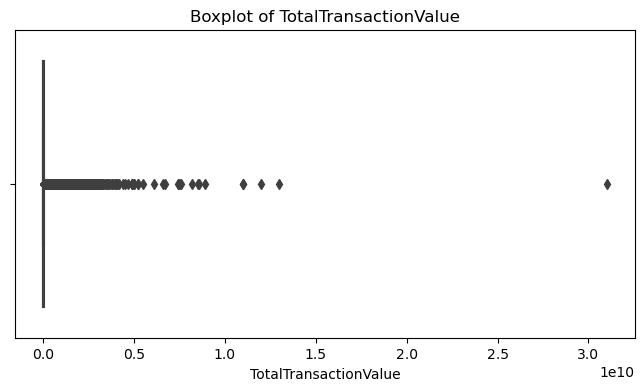

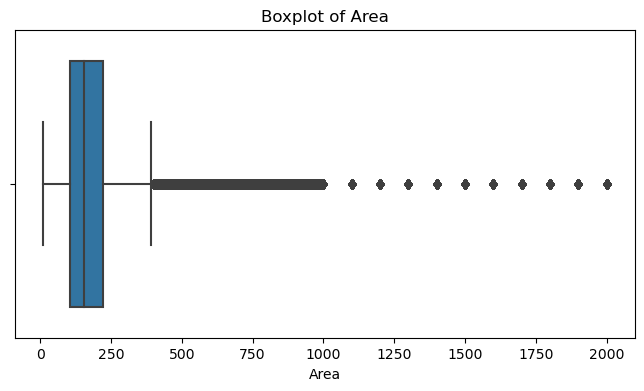

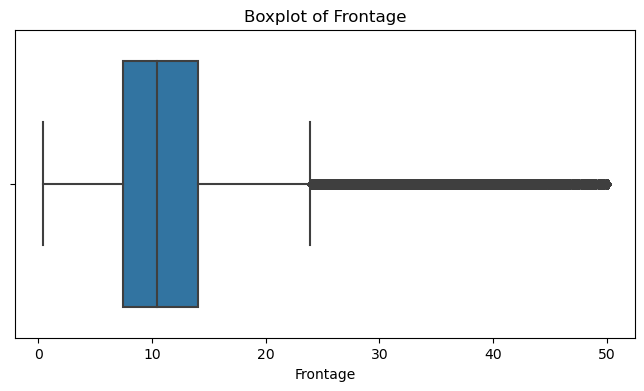

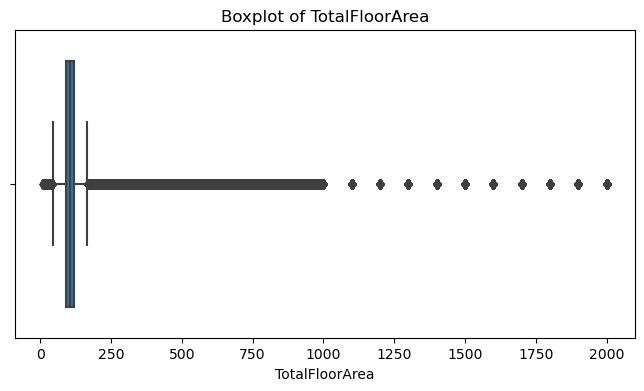

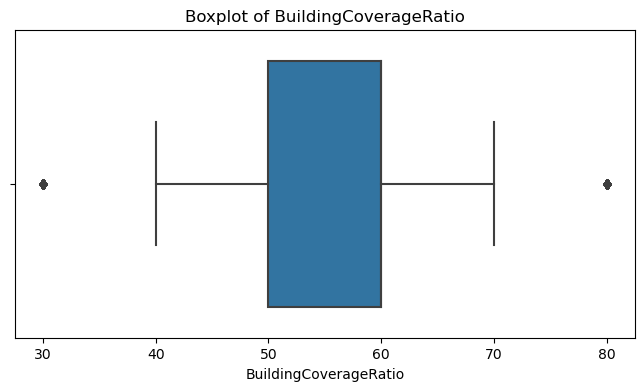

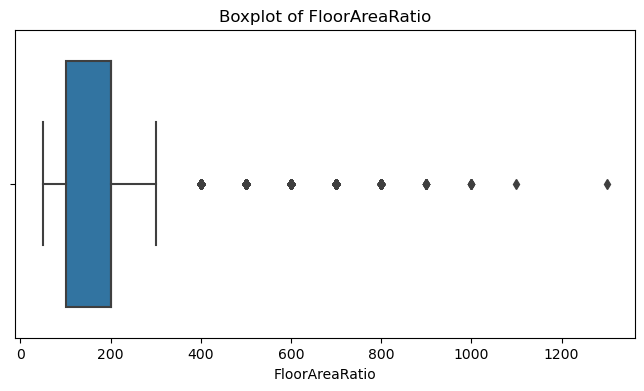

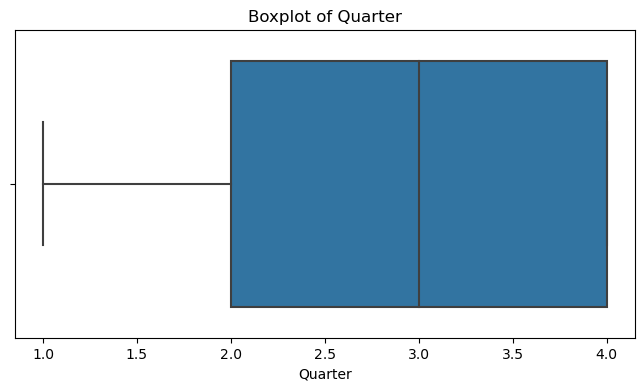

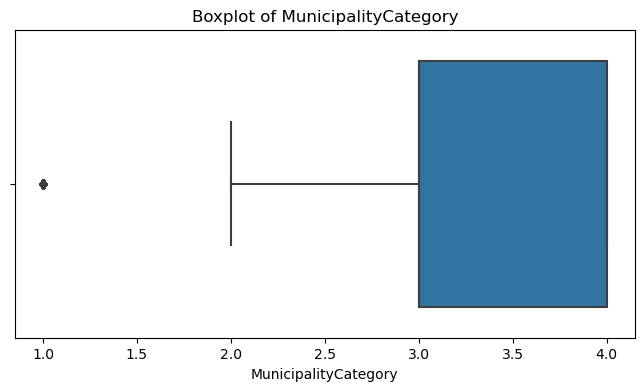

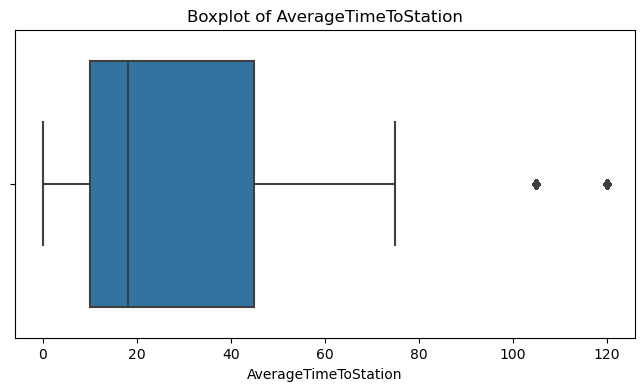

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=housing_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
# Remove outliers using IQR
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

In [15]:
# Apply to numeric columns
for col in numeric_cols:
    housing_df = remove_outliers_iqr(housing_df, col)
    print(f"After removing outliers in {col}, shape: {housing_df.shape}")

After removing outliers in TotalTransactionValue, shape: (1281520, 30)
After removing outliers in Area, shape: (1196671, 30)
After removing outliers in Frontage, shape: (1182641, 30)
After removing outliers in TotalFloorArea, shape: (1081586, 30)
After removing outliers in BuildingCoverageRatio, shape: (1030807, 30)
After removing outliers in FloorAreaRatio, shape: (1025676, 30)
After removing outliers in Quarter, shape: (1025676, 30)
After removing outliers in MunicipalityCategory, shape: (1024560, 30)
After removing outliers in AverageTimeToStation, shape: (996241, 30)


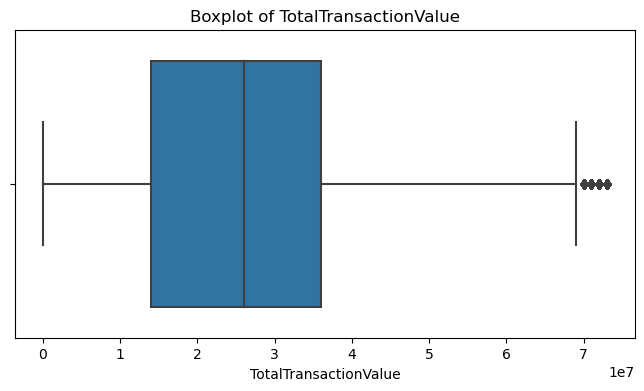

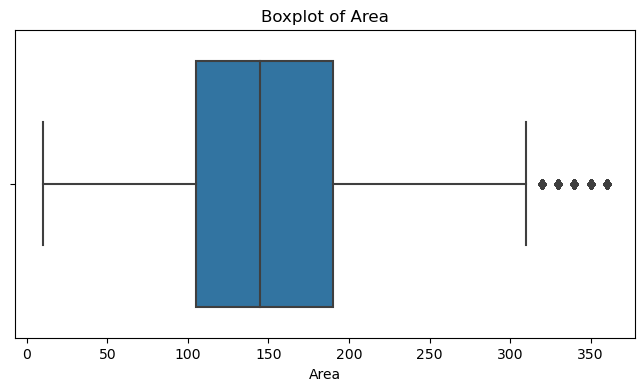

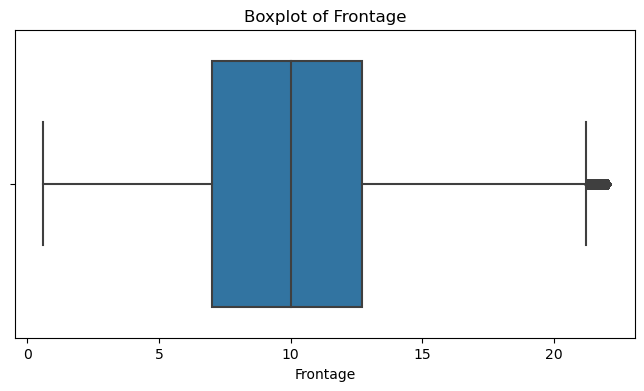

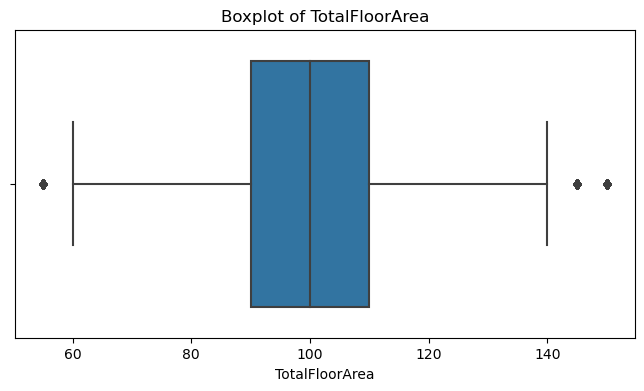

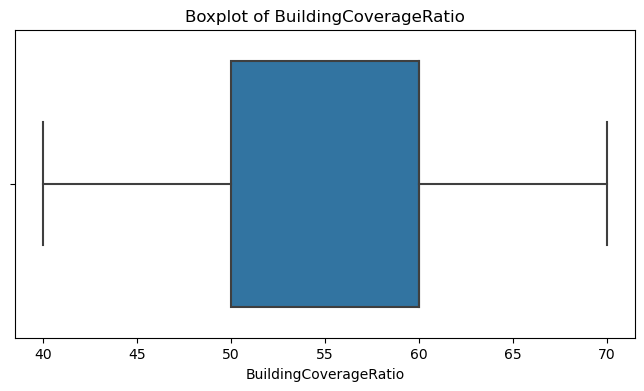

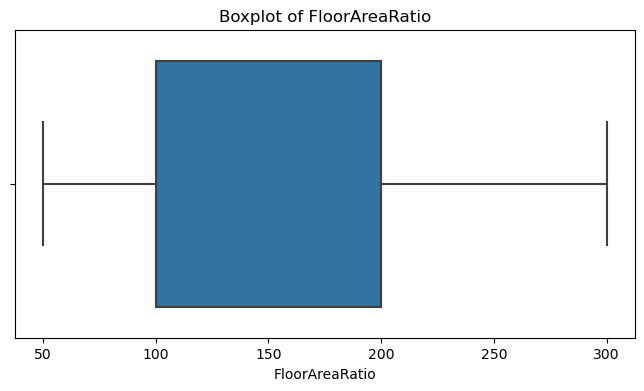

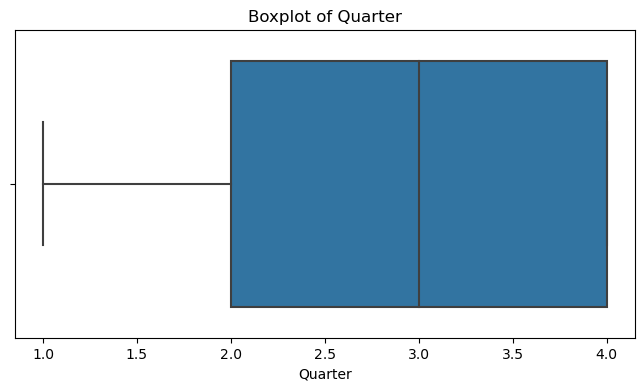

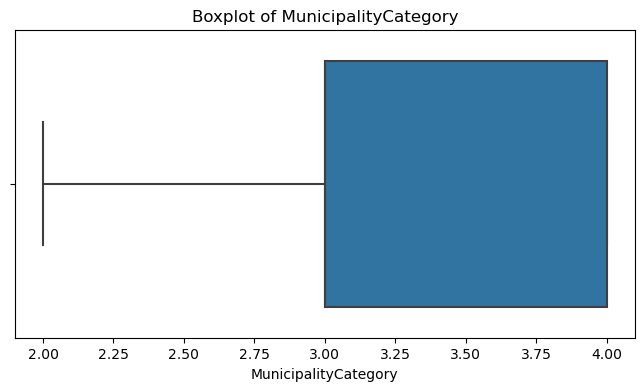

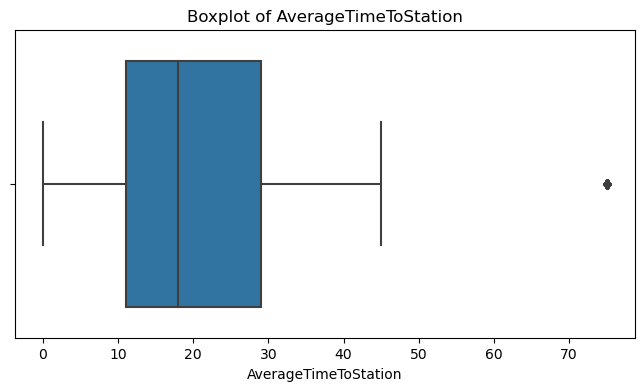

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=housing_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [17]:
bool_cols = housing_df.select_dtypes(include='bool').columns
housing_df[bool_cols] = housing_df[bool_cols].astype(int)

housing_df.head()

,Type,Prefecture,Location,TotalTransactionValue,Area,Frontage,TotalFloorArea,ConstructionYear,BuildingCoverageRatio,FloorAreaRatio,...,BeforeWarFlag,frontage_greater_than_50,AreaGreaterFlag,Region_Chugoku,Region_Hokkaido,Region_Kansai,Region_Kanto,Region_Kyushu,Region_Shikoku,Region_Tohoku
0,Residential Land(Land and Building),Nagano Prefecture,Nagano City,27000000,175,9.0,100,2024,60.0,200.0,...,0,0,0,0,0,0,0,0,0,0
1,Residential Land(Land and Building),Nagano Prefecture,Nagano City,27000000,125,9.0,100,2019,60.0,200.0,...,0,0,0,0,0,0,0,0,0,0
2,Residential Land(Land and Building),Nagano Prefecture,Nagano City,6500000,90,10.0,95,1996,60.0,200.0,...,0,0,0,0,0,0,0,0,0,0
3,Residential Land(Land and Building),Nagano Prefecture,Nagano City,27000000,135,8.5,80,2021,60.0,200.0,...,0,0,0,0,0,0,0,0,0,0
5,Residential Land(Land and Building),Nagano Prefecture,Nagano City,24000000,125,8.0,100,2019,60.0,200.0,...,0,0,0,0,0,0,0,0,0,0


# EDA #

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


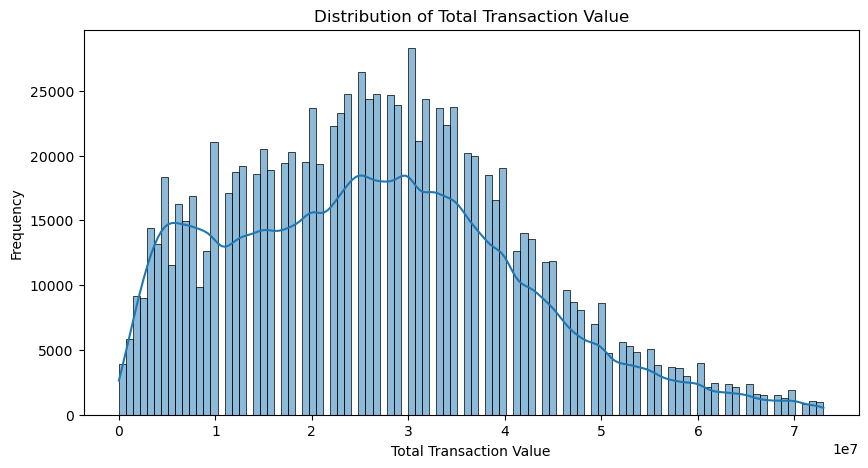

In [18]:
# Distribution of Transaction Values

plt.figure(figsize=(10, 5))
sns.histplot(housing_df['TotalTransactionValue'], kde=True, bins=100)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.show()

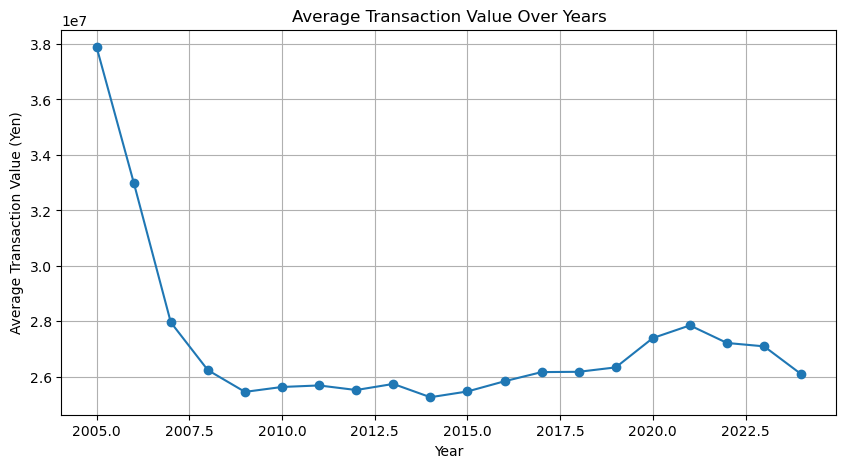

In [19]:
# Transaction Trends Over Time
plt.figure(figsize=(10, 5))
housing_df.groupby('Year')['TotalTransactionValue'].mean().plot(marker='o', linestyle='-')
plt.title("Average Transaction Value Over Years")
plt.xlabel("Year")
plt.ylabel("Average Transaction Value (Yen)")
plt.grid(True)
plt.show()

# Top Prefectures by Number of Transactions

plt.figure(figsize=(10, 5))
top_prefectures = housing_df['Prefecture'].value_counts().head(15)
sns.barplot(x=top_prefectures.values, y=top_prefectures.index, palette='viridis')
plt.title("Top 15 Prefectures by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Prefecture")
plt.show()

News about Tokyo housing prices getting cheaper: https://news.ycombinator.com/item?id=33418125

In [20]:
# Tokyo only dataset

tokyo_df = housing_df[housing_df['Prefecture'] == 'Tokyo']

In [21]:
# Drop Type and Prefecture as it is redundant

tokyo_df = tokyo_df.drop(['Type', 'Prefecture', 'Location'], axis = 1)

In [22]:
# Dropping other regions since the focus is Tokyo 


tokyo_df = tokyo_df.drop(['Region_Chubu', 'Region_Chugoku', 'Region_Hokkaido', 'Region_Kansai', 'Region_Kanto', 'Region_Kyushu', 'Region_Shikoku', 'Region_Tohoku'], axis = 1)

In [23]:
tokyo_df.head()

,TotalTransactionValue,Area,Frontage,TotalFloorArea,ConstructionYear,BuildingCoverageRatio,FloorAreaRatio,Quarter,Year,RegionCommercialArea,RegionIndustrialArea,RegionPotentialResidentialArea,RegionResidentialArea,MunicipalityCategory,AverageTimeToStation,FloorAreaGreaterFLag,BeforeWarFlag,frontage_greater_than_50,AreaGreaterFlag
528245,70000000,45,5.0,60,2019,60.0,300.0,2,2019,0,0,0,1,4,8,0,0,0,0
528246,40000000,50,7.7,60,1982,60.0,300.0,2,2024,0,0,0,1,4,9,0,0,0,0
528254,44000000,40,3.0,55,1966,60.0,300.0,3,2021,0,0,0,1,4,9,0,0,0,0
528264,50000000,75,19.7,110,1970,60.0,300.0,4,2020,0,0,0,1,4,9,0,0,0,0
528265,50000000,55,4.0,60,1970,60.0,300.0,4,2020,0,0,0,1,4,11,0,0,0,0


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


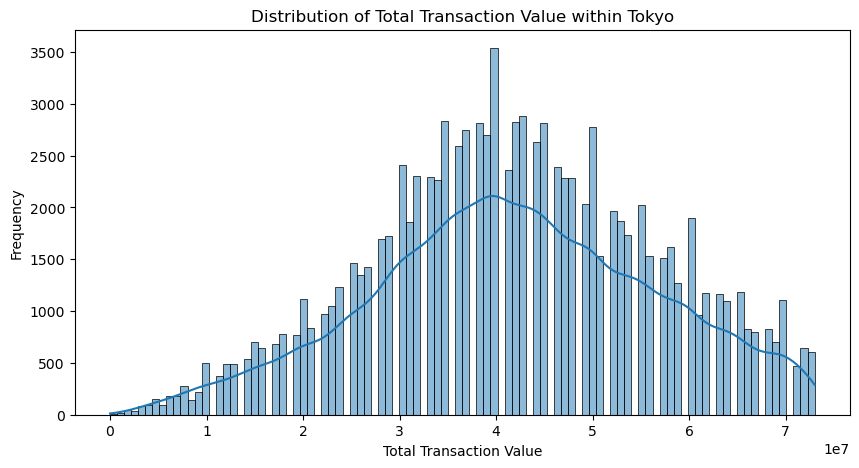

In [24]:
# Distribution of Transaction Values for Tokyo

plt.figure(figsize=(10, 5))
sns.histplot(tokyo_df['TotalTransactionValue'], kde=True, bins=100)
plt.title('Distribution of Total Transaction Value within Tokyo')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.show()

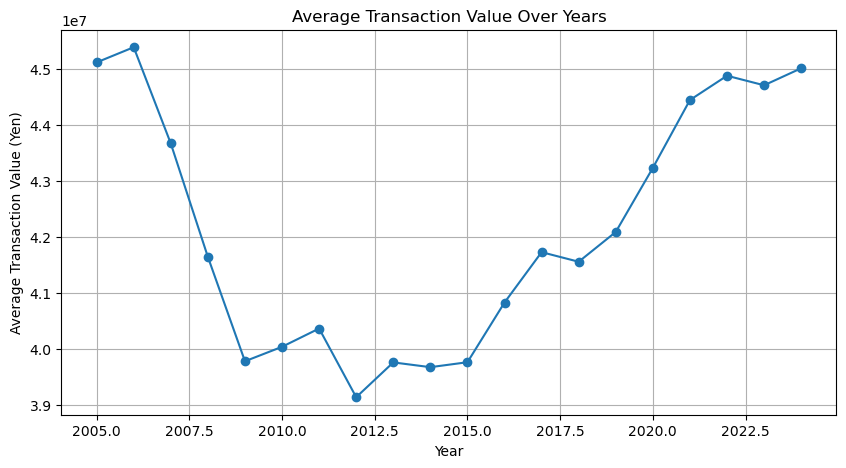

In [25]:
# Transaction Trends Over Time
plt.figure(figsize=(10, 5))
tokyo_df.groupby('Year')['TotalTransactionValue'].mean().plot(marker='o', linestyle='-')
plt.title("Average Transaction Value Over Years")
plt.xlabel("Year")
plt.ylabel("Average Transaction Value (Yen)")
plt.grid(True)
plt.show()

# Data Features

In [26]:
# Additional feature "building_age" to explain more variance in price
tokyo_df['BuildingAge'] = 2025 - tokyo_df['ConstructionYear']

In [27]:
tokyo_df.head()

,TotalTransactionValue,Area,Frontage,TotalFloorArea,ConstructionYear,BuildingCoverageRatio,FloorAreaRatio,Quarter,Year,RegionCommercialArea,RegionIndustrialArea,RegionPotentialResidentialArea,RegionResidentialArea,MunicipalityCategory,AverageTimeToStation,FloorAreaGreaterFLag,BeforeWarFlag,frontage_greater_than_50,AreaGreaterFlag,BuildingAge
528245,70000000,45,5.0,60,2019,60.0,300.0,2,2019,0,0,0,1,4,8,0,0,0,0,6
528246,40000000,50,7.7,60,1982,60.0,300.0,2,2024,0,0,0,1,4,9,0,0,0,0,43
528254,44000000,40,3.0,55,1966,60.0,300.0,3,2021,0,0,0,1,4,9,0,0,0,0,59
528264,50000000,75,19.7,110,1970,60.0,300.0,4,2020,0,0,0,1,4,9,0,0,0,0,55
528265,50000000,55,4.0,60,1970,60.0,300.0,4,2020,0,0,0,1,4,11,0,0,0,0,55


In [28]:
# Loading Japanese Annual CPI (2005-2024) as per https://www.rateinflation.com/consumer-price-index/japan-historical-cpi/
cpi_df = pd.read_csv('Annual CPI of Japan (2005-2024).csv')

In [29]:
merged_df = pd.merge(tokyo_df, cpi_df, on='Year')

In [30]:
# Current Japanese Base CPI is 2020 as per https://www.stat.go.jp/english/data/cpi/1590.html
base_year = 2020
base_cpi = cpi_df.loc[cpi_df['Year'] == base_year, 'CPI'].values[0]

In [31]:
# Calculation and additional feature for Adjusted Total Transaction Value to account for inflation
merged_df['AdjustedTotalTransactionValue'] = merged_df['TotalTransactionValue'] * (base_cpi / merged_df['CPI'])

pd.set_option('display.float_format', '{:.2f}'.format)
merged_df.head()

,TotalTransactionValue,Area,Frontage,TotalFloorArea,ConstructionYear,BuildingCoverageRatio,FloorAreaRatio,Quarter,Year,RegionCommercialArea,...,RegionResidentialArea,MunicipalityCategory,AverageTimeToStation,FloorAreaGreaterFLag,BeforeWarFlag,frontage_greater_than_50,AreaGreaterFlag,BuildingAge,CPI,AdjustedTotalTransactionValue
0,70000000,45,5.00,60,2019,60.00,300.00,2,2019,0,...,1,4,8,0,0,0,0,6,100.00,70000000.00
1,40000000,50,7.70,60,1982,60.00,300.00,2,2024,0,...,1,4,9,0,0,0,0,43,108.50,36866359.45
2,44000000,40,3.00,55,1966,60.00,300.00,3,2021,0,...,1,4,9,0,0,0,0,59,99.80,44088176.35
3,50000000,75,19.70,110,1970,60.00,300.00,4,2020,0,...,1,4,9,0,0,0,0,55,100.00,50000000.00
4,50000000,55,4.00,60,1970,60.00,300.00,4,2020,0,...,1,4,11,0,0,0,0,55,100.00,50000000.00


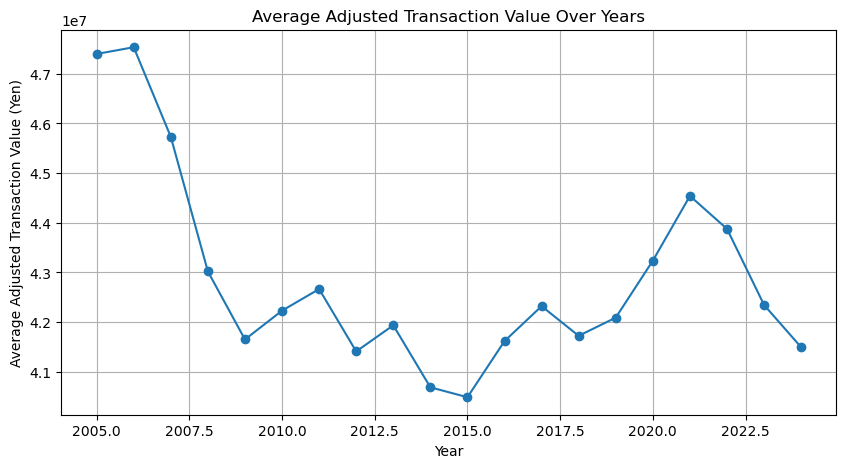

In [33]:
# Transaction Trends Over Time
plt.figure(figsize=(10, 5))
merged_df.groupby('Year')['AdjustedTotalTransactionValue'].mean().plot(marker='o', linestyle='-')
plt.title("Average Adjusted Transaction Value Over Years")
plt.xlabel("Year")
plt.ylabel("Average Adjusted Transaction Value (Yen)")
plt.grid(True)
plt.show() 

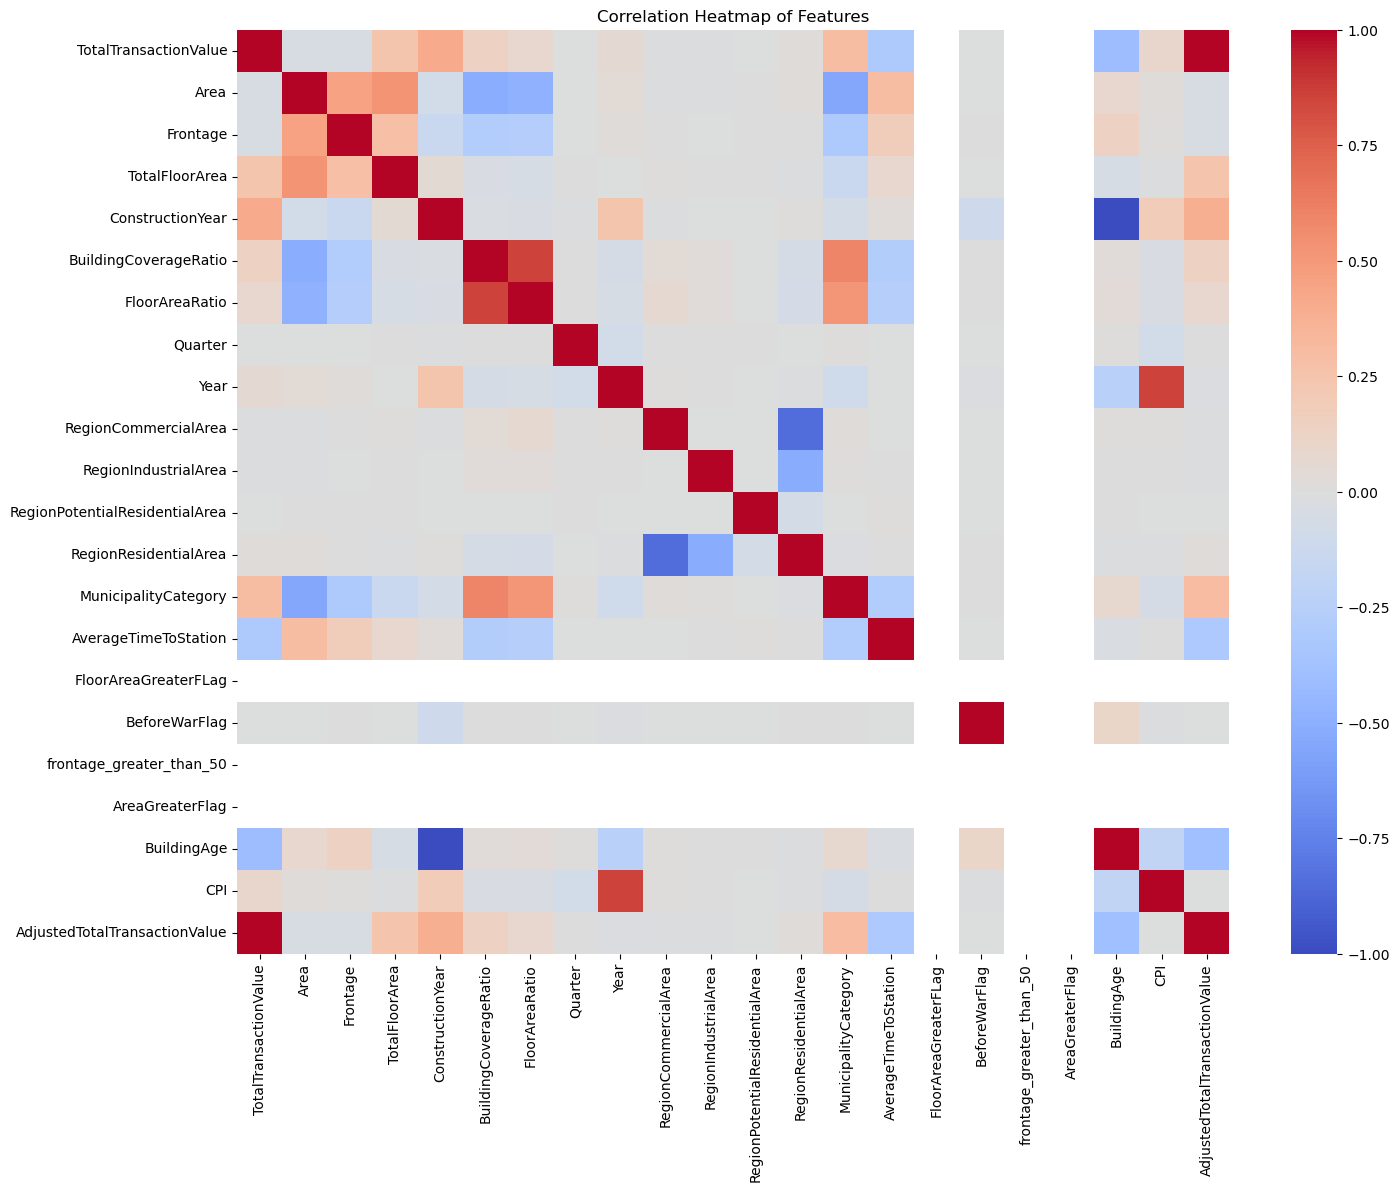

In [34]:
# Correlation of TotalTransactionValue

plt.figure(figsize=(16, 12))
sns.heatmap(merged_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

# Preprocessing

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Split features and target
X = merged_df.drop('AdjustedTotalTransactionValue', axis=1)
y = merged_df['AdjustedTotalTransactionValue']

In [37]:
# STEP 1: Split off the test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)

# STEP 2: Split remaining into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)
# 0.25 of 80% = 20%, so now you have 60/20/20

# Modelling and Training of Data

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_val_pred = lm.predict(X_val)

In [41]:
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: {val_rmse:.3f}, R²: {val_r2:.3f}")

TypeError: got an unexpected keyword argument 'squared'

In [42]:
y_test_pred = lm.predict(X_test)

# Evaluation

# Regression Evaluation Metrics

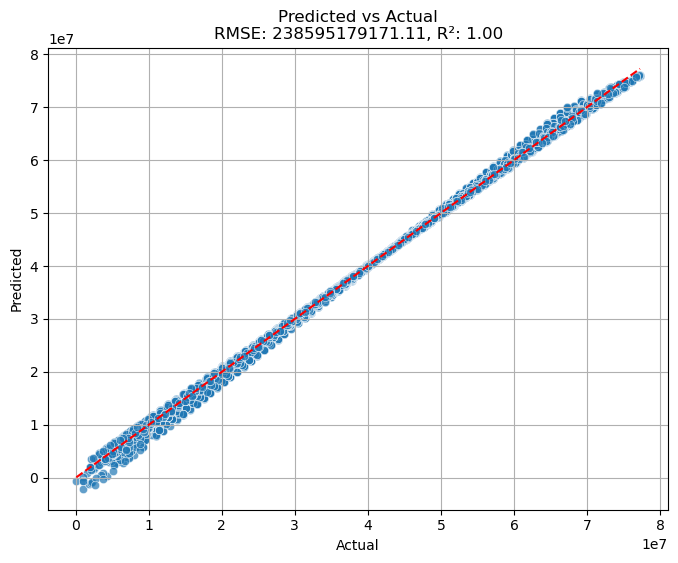

In [44]:
# Predict
y_pred = lm.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual\nRMSE: {rmse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


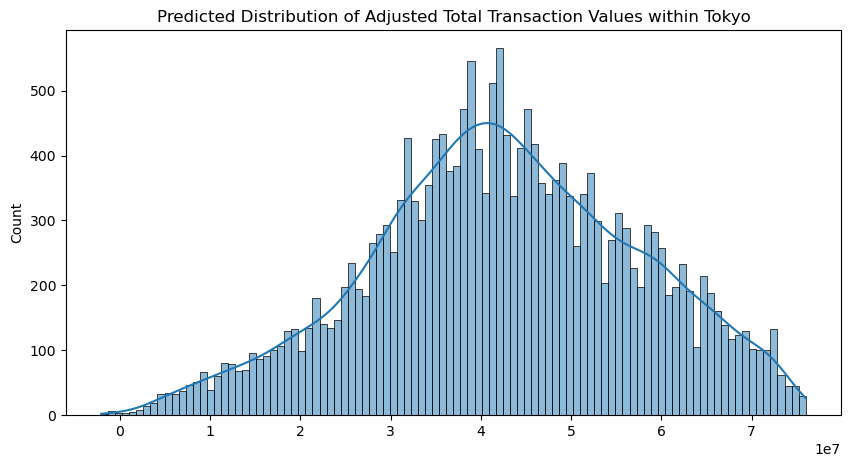

In [45]:
# Distribution of Transaction Values for Tokyo

plt.figure(figsize=(10, 5))
sns.histplot(y_pred, kde=True, bins=100)
plt.title("Predicted Distribution of Adjusted Total Transaction Values within Tokyo")
plt.show()

In [46]:
test_indices = X_test.index

# Created a new DataFrame with Year and predicted values
test_results = merged_df.loc[test_indices, ['Year']].copy()
test_results['PredictedValue'] = y_test_pred

In [47]:
from sklearn.metrics import mean_squared_error

train_pred = lm.predict(X_train)
val_pred = lm.predict(X_val)

train_mse = mean_squared_error(y_train, train_pred)
val_mse = mean_squared_error(y_val, val_pred)

print(f"Train MSE: {train_mse:.2f}")
print(f"Validation MSE: {val_mse:.2f}")

Train MSE: 240356811154.69
Validation MSE: 243302530834.62


In [48]:
SSE = sum((y_val - y_pred)**2)
SSR = sum((y_pred - np.mean(y_val))**2)
SST = sum((y_val - np.mean(y_val))**2)

print("SSE value: ",SSE)
print("SSR Value: ",SSR)
print("SST value:",SST)

SSE value:  9.29658700426761e+18
SSR Value:  4.541441045630737e+18
SST value: 4.610378962735085e+18


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(lm, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.99815417 0.99879909 0.99850698 0.99884249 0.99855991]
Average accuracy: 0.9985725298421032
